# <center>Website Redesigning</center>

## Which version of the website should you use?

### 📖 Background
You work for an early-stage startup in Germany. Your team has been working on a redesign of the landing page. The team believes a new design will increase the number of people who click through and join your site. 

They have been testing the changes for a few weeks and now they want to measure the impact of the change and need you to determine if the increase can be due to random chance or if it is statistically significant.

### 💾 The data
The team assembled the following file:

#### Redesign test data
- "treatment" - "yes" if the user saw the new version of the landing page, no otherwise.
- "new_images" - "yes" if the page used a new set of images, no otherwise.
- "converted" - 1 if the user joined the site, 0 otherwise.

The control group is those users with "no" in both columns: the old version with the old set of images.

In [ ]:
import pandas as pd
df = pd.read_csv('./data/redesign.csv')
df.head()

,treatment,new_images,converted
0,yes,yes,0
1,yes,yes,0
2,yes,yes,0
3,yes,no,0
4,no,yes,0


## 💪 Challenge
Complete the following tasks:

1. Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
2. Can the increases observed be explained by randomness? (Hint: Think A/B test)
3. Which version of the website should they use?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Introduction
1. There are two changes to the website - landing page & pictures
2. Four groups of users:
    - A: new landing page & new pictures
    - B: new landing page & old pictures
    - C: old landing page & new pictures
    - D: old landing page & old pictures

### Question 1
### Analyze the conversion rates for each of the four groups: the new/old design of the landing page and the new/old pictures.
1. Under old pictures case, adding a new landing page increases the conversion rate from D(0.107) to B(0.120)
2. Under new pictures case, adding a new landing page increases the conversion rate from C(0.113) to A(0.114)
3. Under old landing page case, adding new pictures increases the conversion rate from D(0.107) to C(0.113)
4. Under new landing page case, adding a new picture decreases in conversion rate from B(0.120) to A(0.114) which is an interesting case

* Reference:
    - A: 0.11372394032210256
    - B: 0.12004742614366169
    - C: 0.11253828673056022
    - D: 0.10710404110265784

In [ ]:
A = df[(df['treatment'] == 'yes') & (df['new_images'] == 'yes')]
B = df[(df['treatment'] == 'yes') & (df['new_images'] == 'no')]
C = df[(df['treatment'] == 'no') & (df['new_images'] == 'yes')]
D = df[(df['treatment'] == 'no') & (df['new_images'] == 'no')]

In [ ]:
A_conv = np.sum(A['converted']) / len(A)
B_conv = np.sum(B['converted']) / len(B)
C_conv = np.sum(C['converted']) / len(C)
D_conv = np.sum(D['converted']) / len(D)

In [ ]:
A_conv, B_conv, C_conv, D_conv

(0.11372394032210256,
 0.12004742614366169,
 0.11253828673056022,
 0.10710404110265784)

### Question 2
### Can the increases observed be explained by randomness? (Hint: Think A/B test)

Using Fisher's hypothesis testing procedure
1. Null hypothesis H0: two websites(G1 and G2) have no differences for the conversion rates
2. Define test statistics: t(X) = the absolute difference between the convertion rates (G1 - G2)
3. Create 10000 synthetic dataset X* using resampling from the dataset based on the null hypothesis 
    (if two groups have no differences, then we can combine the datasets for resampling)
4. Plot the histogram showing the distribution of test statistics and mark the actual observed value t(x).
   Find the probability of seeing a result as extreme or more extreme than t(x), assuming the H0 is true.

In [ ]:
def conv(G):
    return np.sum(G) / len(G)

# test statistics
def t(G):
    G1, G2 = G
    return np.abs(conv(G1) - conv(G2))

# resample
def resample(data, size_1, size_2):
    return np.random.choice(data, size=size_1, replace=True), np.random.choice(data, size=size_2, replace=True)

def hyptest(G1, G2): # input the two datasets from Group 1 and Group 2
    data = np.concatenate([G1, G2])
    real_conv = t((G1,G2))
    t_ = np.array([t(resample(data, len(G1), len(G2))) for _ in range(10000)])
    fig, ax = plt.subplots()
    bins = np.linspace(-0.015, 0.015, 60)
    ax.hist(t_, bins=bins, alpha=.5)
    ax.hist(t_[t_ >= real_conv], bins=bins, color='red')
    plt.axvline(x=real_conv, linestyle='dashed', color='black')
    p = np.mean(t_ >= np.abs(real_conv))
    ax.set_title(f"The p value is: {p}")
    plt.show()

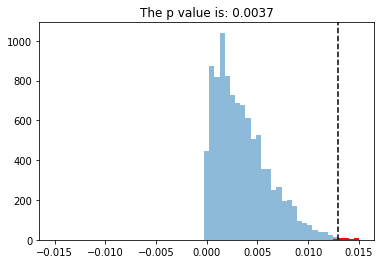

In [ ]:
# D: old landing page & old pictures
# B: new landing page & old pictures
hyptest(D['converted'], B['converted'])

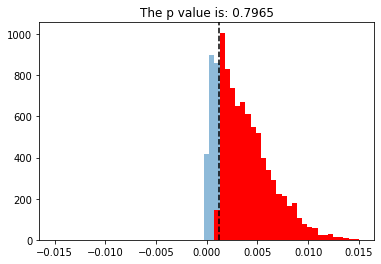

In [ ]:
# C: old landing page & new pictures
# A: new landing page & new pictures
hyptest(C['converted'], A['converted'])

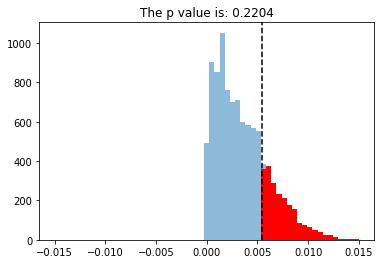

In [ ]:
# D: old landing page & old pictures
# C: old landing page & new pictures
hyptest(D['converted'], C['converted'])

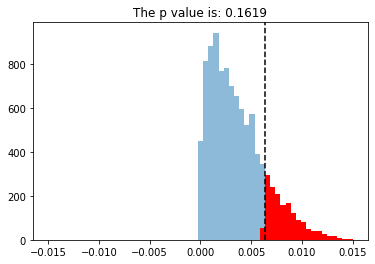

In [ ]:
# A: new landing page & new pictures
# B: new landing page & old pictures
hyptest(A['converted'], B['converted'])

### Question 2 Summary
* Consider whether the following changes are due to randomness using the p-value:
    1. "Under old pictures case, adding a new landing page increases the conversion rate from D(0.107) to B(0.120)":
        - The p-value is around 0.003, which is very significant, hence the change is most likely not due to randomness
    2. "Under new pictures case, adding a new landing page increases the conversion rate from C(0.113) to A(0.114)":
        - The p-value is around 0.798, which is not significant at all, hence the change is most likely because of randomness
    3. "Under old landing page case, adding new pictures increases the conversion rate from D(0.107) to C(0.113)":
        - The p-value is around 0.214, which is not significant, hence the change is most likely due to randomness
    4. "Under new landing page case, adding a new picture decreases in conversion rate from B(0.120) to A(0.114)":
        - The p-value is around 0.170, which is relatively significant, hence the change may not due to randomness

## Summary
### Which version of the website should they use?
* From the A/B testing results, we should add the new landing page, but not the new pictures.